# Hotel Reservation Classification Model

### Importing the libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ds=pd.read_csv("D:\Mayank\Data science\Hotel Reservations.csv")
dscopy=ds.copy(deep=True)

### Reading the Data

In [3]:
print(dscopy.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [4]:
print(dscopy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
print(dscopy.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     8

### EDA

In [6]:
dscopy.drop('Booking_ID',axis=1,inplace=True)

In [7]:
for x in dscopy.columns:
    if(dscopy[(x)].dtype==object):
        print(x,'=',dscopy[(x)].unique())

type_of_meal_plan = ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved = ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type = ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status = ['Not_Canceled' 'Canceled']


In [8]:
num=[]
cat=[]

In [9]:
for m in dscopy.columns:
    if(dscopy[(m)].dtype==object):
        cat.append(m)
    else:
        num.append(m)

In [10]:
print(num)
print(cat)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [22]:
print(dscopy.head(20))

    no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0              2               0                     1                  2   
1              2               0                     2                  3   
2              1               0                     2                  1   
3              2               0                     0                  2   
4              2               0                     1                  1   
5              2               0                     0                  2   
6              2               0                     1                  3   
7              2               0                     1                  3   
8              3               0                     0                  4   
9              2               0                     0                  5   
10             1               0                     1                  0   
11             1               0                     2                  1   

### Data Visualization

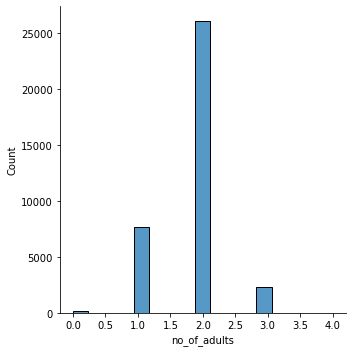

In [11]:
G1=sns.displot(dscopy['no_of_adults'])

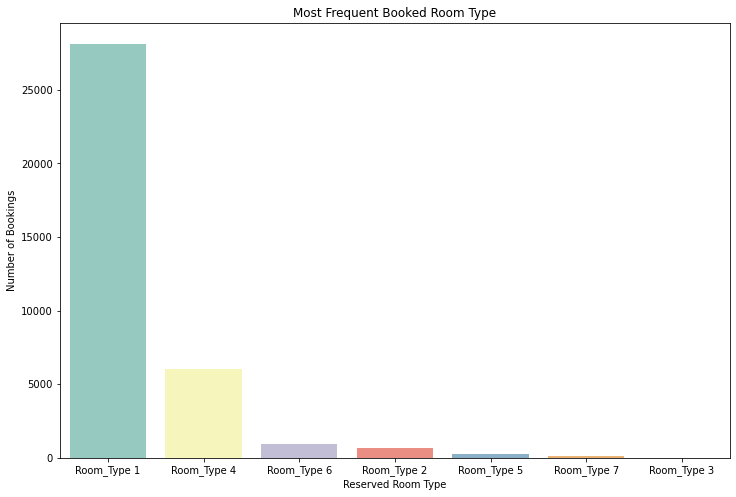

In [36]:
plt.figure(figsize=(12, 8))

# Create a countplot for room type
sns.countplot(x='room_type_reserved', data=ds, order=ds['room_type_reserved'].value_counts().index, palette='Set3')

# Set plot labels and title
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.title('Most Frequent Booked Room Type')

# Show the plot
plt.show()

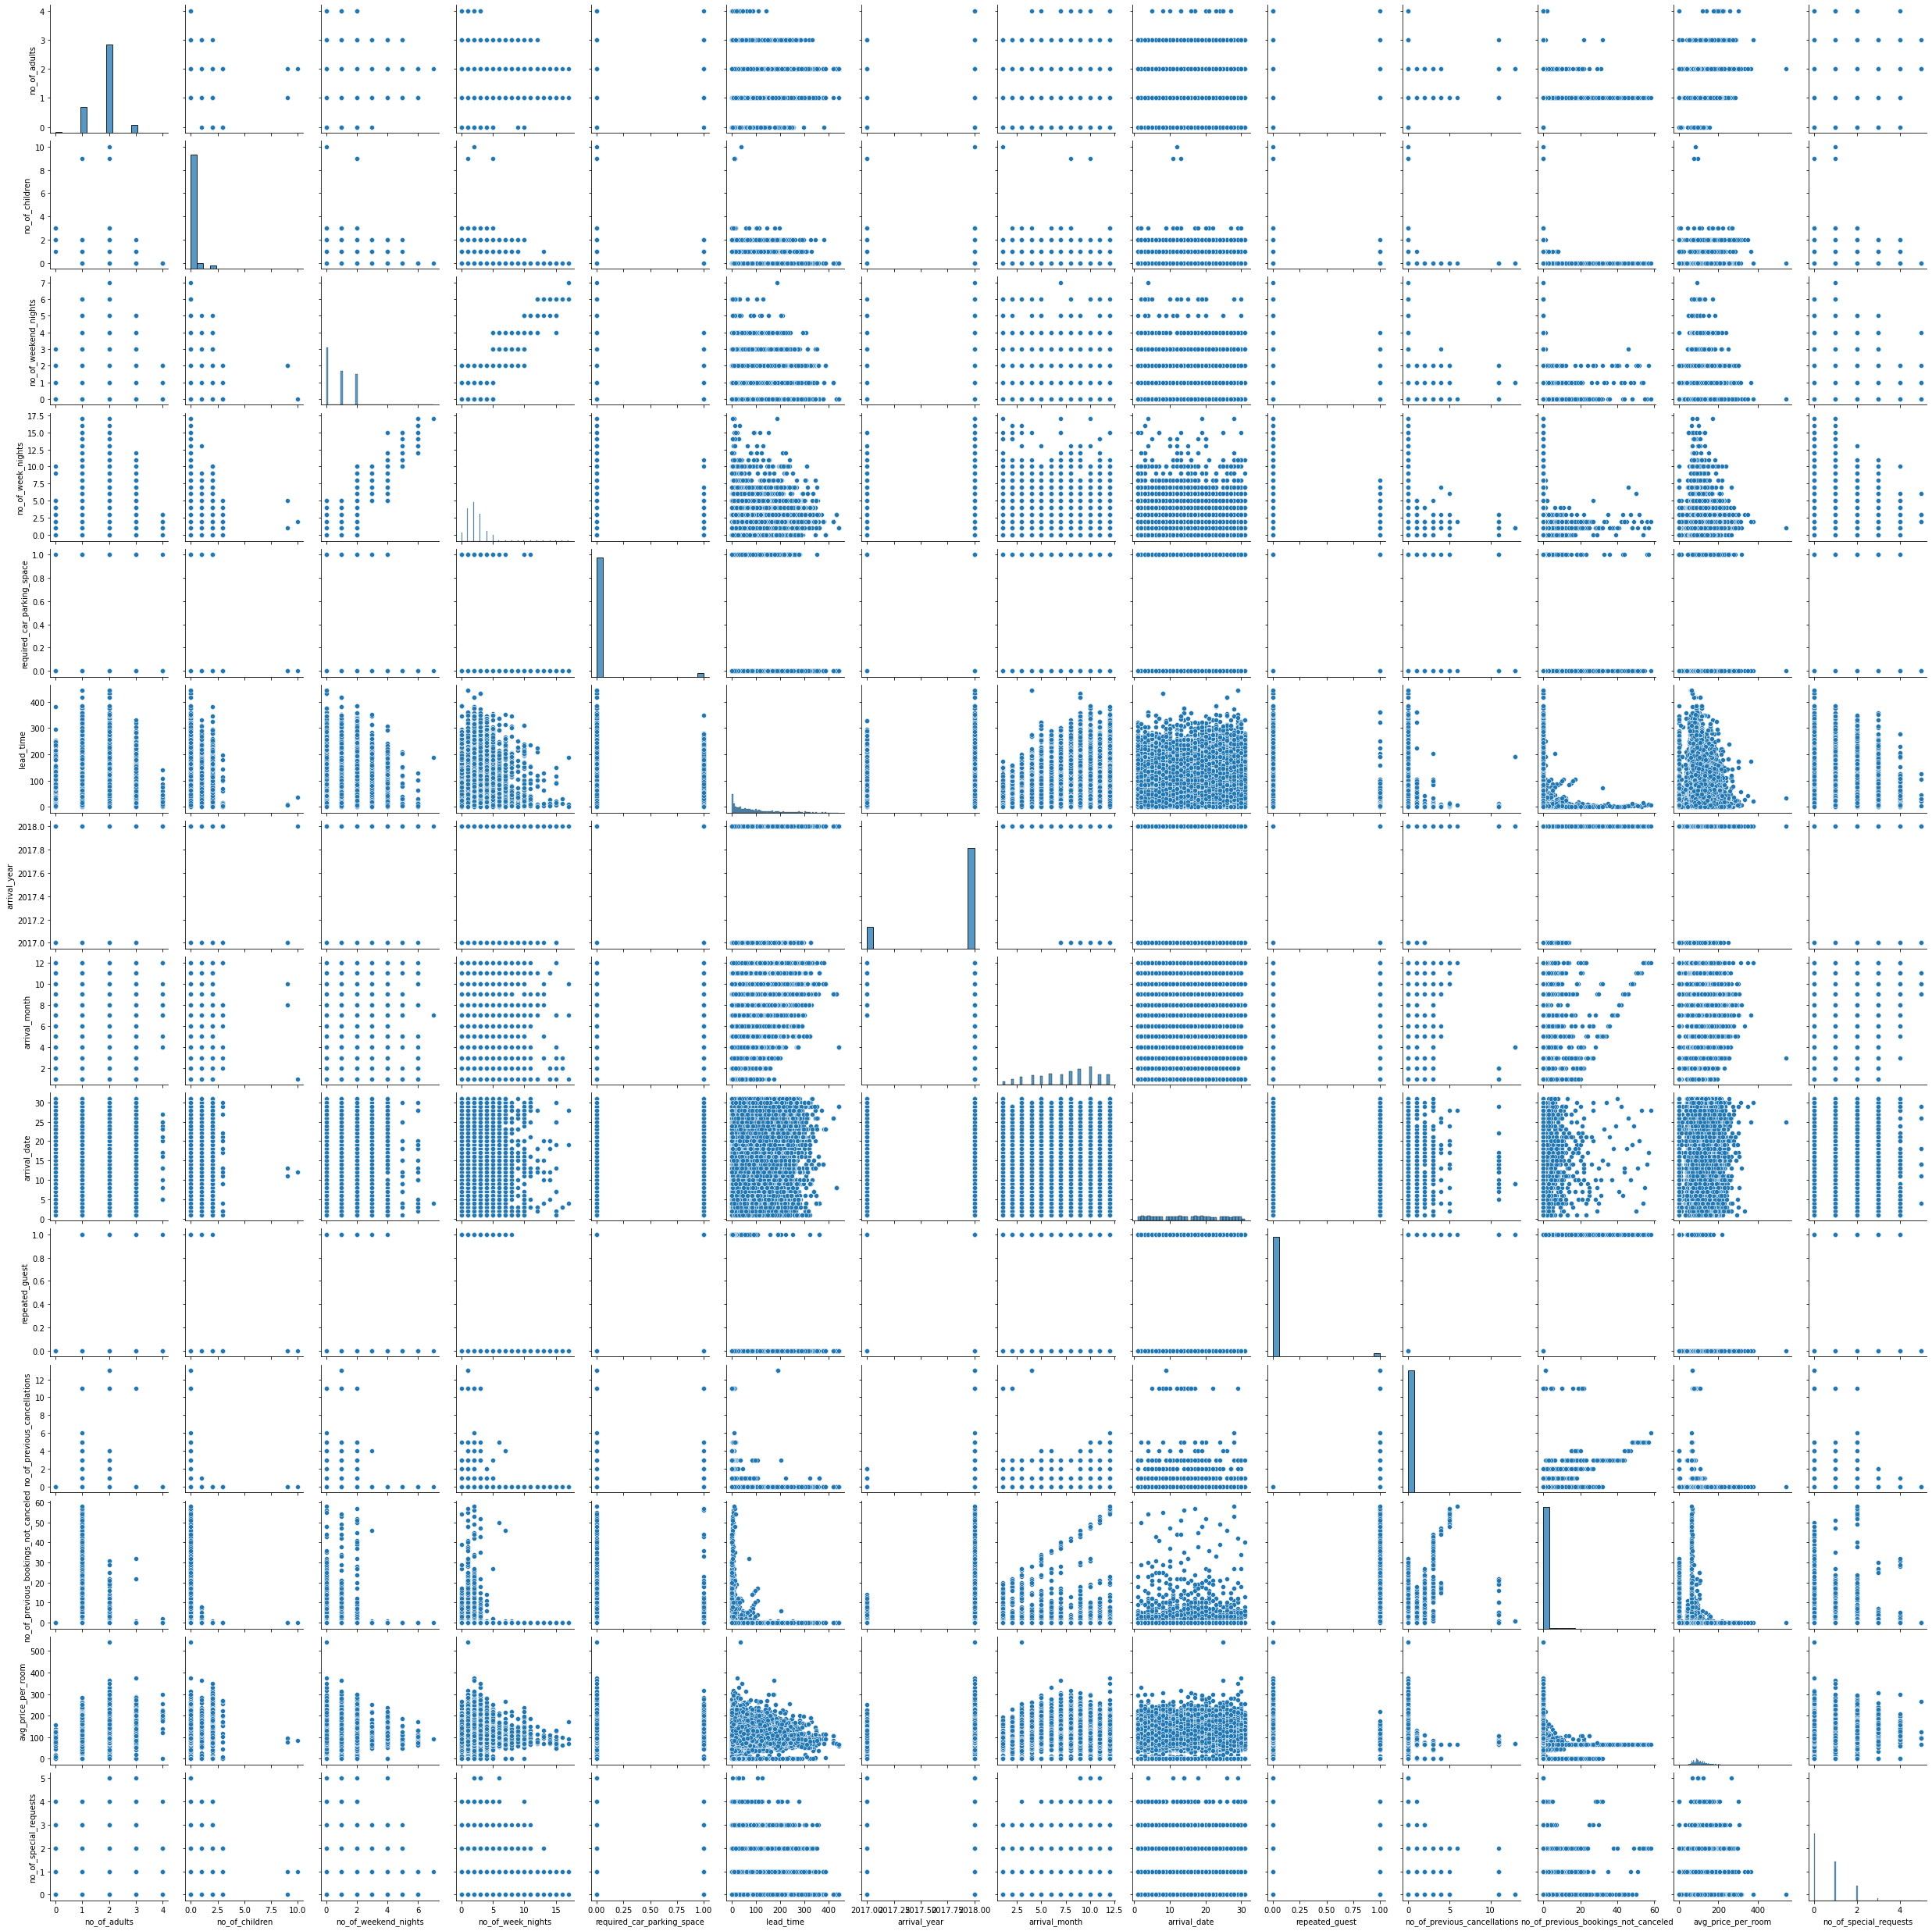

In [12]:
G2=sns.pairplot(dscopy[num],diag_kind='hist')

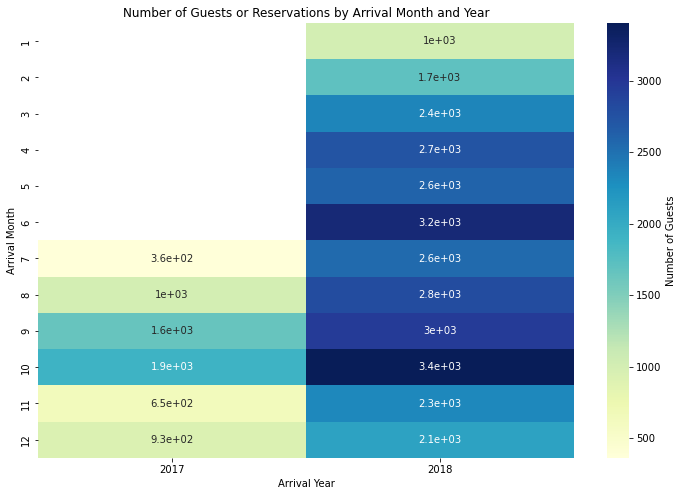

In [24]:
guests_by_month_year = ds.groupby(['arrival_year', 'arrival_month']).size().reset_index(name='guest_count')

# Pivot the DataFrame for heatmap
guests_pivot = guests_by_month_year.pivot('arrival_month', 'arrival_year', 'guest_count')

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(guests_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Number of Guests'})

# Set plot labels and title
plt.xlabel('Arrival Year')
plt.ylabel('Arrival Month')
plt.title('Number of Guests or Reservations by Arrival Month and Year')

# Show the plot
plt.show()

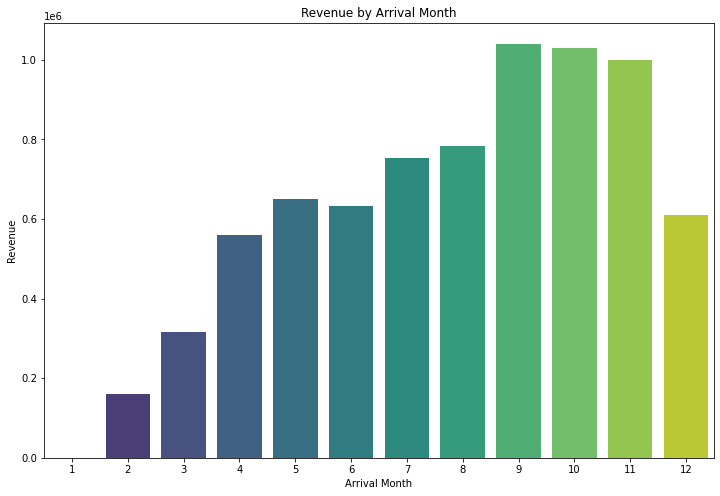

In [31]:
revenue_by_month = ds.groupby('arrival_month')['avg_price_per_room'].mean().reset_index(name='avg_price')
revenue_by_month['revenue'] = revenue_by_month['avg_price'] * ds.groupby('arrival_month')['no_of_week_nights'].sum()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='arrival_month', y='revenue', data=revenue_by_month, palette='viridis')

# Set plot labels and title
plt.xlabel('Arrival Month')
plt.ylabel('Revenue')
plt.title('Revenue by Arrival Month')

# Show the plot
plt.show()

### Training the model

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dscopy[cat]:
    dscopy[i]=le.fit_transform(dscopy[i])

In [14]:
dscopy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [15]:
x=dscopy.drop("booking_status",axis=1)
y=dscopy["booking_status"]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
R=make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))
R.fit(x_train,y_train)
pred=R.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
print(accuracy)

0.8016540317022743


##### StandarScaler and pipeline increased the accuracy, so in future we can improve the accuracy even more with proper standarization and mean variance